## Exercise 

## marketing customeranalysis  

## Round 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from array import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('./csv_files/marketing_customer_analysis.csv')

#df.drop(['Unnamed: 0'], axis=1, inplace=True)

df.columns= df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [3]:
df['state'].fillna(stats.mode(df['state']), inplace=True)
df['response'].fillna(stats.mode(df['response']), inplace=True)
df['vehicle_class'].fillna(stats.mode(df['vehicle_class']), inplace=True)
df['vehicle_size'].fillna(stats.mode(df['vehicle_size']), inplace=True)
df['months_since_last_claim'].fillna(np.mean(df['months_since_last_claim']), inplace=True)
df['number_of_open_complaints'].fillna(np.median(df['number_of_open_complaints']), inplace=True)
#df['vehicle_type'].fillna('unknown', inplace=True)
df.isna().sum()


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [4]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')


In [5]:
y = df['total_claim_amount']
X = df.drop(['total_claim_amount'], axis=1)

In [6]:
X_num = X._get_numeric_data()
#X_num = X_num.drop(['response_rate' ], axis=1)
X_cat = X.select_dtypes('object')


In [7]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized #this is an array
X_num = pd.DataFrame(x_normalized, columns=X_num.columns) #now we convert the array to a dataframe

# # Normalizing data: make data range from 0 - 1, instead of from min to max
# transformer = MinMaxScaler().fit(X)
# x_normalized = transformer.transform(X)
# print(x_normalized.shape)
# x_normalized=pd.DataFrame(x_normalized, columns=X.columns)
# x_normalized


(9134, 7)


In [8]:
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

In [9]:
X

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [10]:
X_cat = X_cat.drop(['customer'],axis=1)
X_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [11]:
encoder = OneHotEncoder().fit(X_cat)
encoded_for_p = encoder.transform(X_cat).toarray()
encoded_for_p
encoder.categories_

cols=[colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded_for_p = pd.DataFrame(encoded_for_p,columns=cols)
cols_to_drop=[row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded_for_p = onehot_encoded_for_p.drop(cols_to_drop,axis=1)
onehot_encoded_for_p.head()
# print(encoded_for_p)
# print(cols)
onehot_encoded_for_p

,California,Nevada,Oregon,Washington,Yes,Extended,Premium,College,Doctor,High School or Below,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X = pd.concat([X_num, onehot_encoded_for_p], axis=1)
X.shape
X.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
monthly_premium_auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
months_since_policy_inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0
California,9134.0,0.344865,0.475350,0.0,0.000000,0.000000,1.000000,1.0
Nevada,9134.0,0.096562,0.295377,0.0,0.000000,0.000000,0.000000,1.0
Oregon,9134.0,0.284760,0.451325,0.0,0.000000,0.000000,1.000000,1.0


In [13]:
###  Linear Riggresion

In [14]:
# train test split is the way ML generates its claim to fame: 
# we build the model on a portion of the data but we then validate it in 
# another "fresh" portion
# our model has no opportunity to "cheat": it must accurately guess the values 
# in the "fresh" dataset that it never saw before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7307, 50)
(1827, 50)
(7307,)
(1827,)


In [15]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,California,Nevada,Oregon,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
5123,0.035258,0.511537,0.000000,0.800000,0.323232,0.2,1.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7738,0.011416,0.000000,0.075949,0.857143,0.252525,0.0,0.000,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
214,0.012464,0.811124,0.054852,0.200000,0.676768,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8580,0.039793,0.722777,0.012658,0.057143,0.666667,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7857,0.008748,0.547474,0.021097,0.085714,0.868687,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.066763,0.879737,0.000000,0.885714,0.636364,0.0,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5191,0.044223,0.225243,0.050633,0.485714,0.646465,0.0,0.250,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,0.087130,0.000000,0.286920,0.371429,0.040404,0.0,0.750,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
860,0.156427,0.000000,0.329114,0.142857,0.565657,0.0,0.125,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
y_train

5123     223.305224
7738     568.800000
214      355.200000
8580     272.649844
7857     391.970334
           ...     
5734     308.321335
5191     350.400000
5390    1059.572464
860      667.200000
7270     344.015386
Name: total_claim_amount, Length: 7307, dtype: float64

In [17]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,California,Nevada,Oregon,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
708,0.028548,0.745992,0.189873,0.028571,0.494949,0.0,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
47,0.044412,0.232224,0.042194,0.200000,0.101010,0.0,0.375,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3995,0.023458,0.949210,0.139241,0.085714,0.383838,0.0,0.000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1513,0.073892,0.771677,0.160338,0.085714,0.272727,0.2,0.500,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3686,0.074099,0.237735,0.033755,0.514286,0.141414,0.0,0.125,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,0.083396,0.591092,0.206751,0.885714,0.737374,0.0,0.250,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1880,0.070315,0.699133,0.012658,0.657143,0.686869,0.0,0.125,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8472,0.033925,0.898511,0.232068,0.685714,0.111111,0.0,0.000,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5967,0.002350,0.000000,0.008439,0.857143,0.060606,0.2,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
y_test

708     218.598065
47      447.793440
3995    451.200000
1513    355.641958
3686    470.097411
           ...    
4855    665.931223
1880     33.970000
8472     43.155950
5967    453.600000
7971    852.460341
Name: total_claim_amount, Length: 1827, dtype: float64

In [19]:
from sklearn import linear_model
#we train/fit our model like yesterday
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
#from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7742149289823107

In [21]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our donations, not just repeating the values it has seen in the training data
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)


0.7626625151786844

In [22]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions_test))

137.3715779611324

In [23]:
mse=mean_squared_error(y_test,predictions_test)
mse

18870.95043153148

In [24]:
#predict and inspect results
results_for_p = lm.predict(X)

pd.concat([df,pd.Series(results_for_p)],axis=1).head(30)
#dont retrain transformers

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,0
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,368.901797
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,644.379554
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,565.477331
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,639.169658
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,96.607924
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,-21.781550
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,315.568966
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,...,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize,518.733913
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,405.862998
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,...,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize,341.106786


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


### Use the concept of multicollinearity and remove insignificant variables

In [26]:
y = df['total_claim_amount']
X = df.drop(['total_claim_amount'], axis=1)
X_num = X._get_numeric_data()

In [27]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized #this is an array
X_num = pd.DataFrame(x_normalized, columns=X_num.columns) #now we convert the array to a dataframe

(9134, 7)


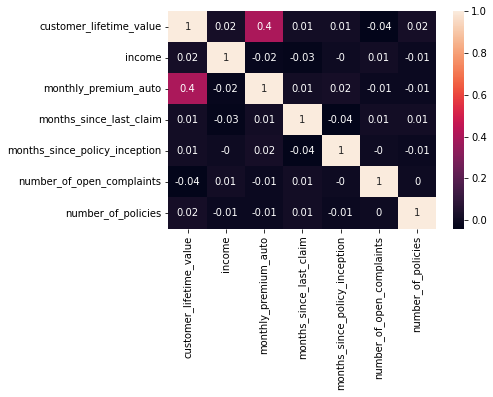

CPU times: total: 297 ms
Wall time: 296 ms


In [28]:
%%time
correlations_matrix = round(X_num.corr(),2)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [29]:
X_num = X_num['monthly_premium_auto']

In [30]:
X_num

0       0.033755
1       0.139241
2       0.198312
3       0.189873
4       0.050633
          ...   
9129    0.050633
9130    0.075949
9131    0.101266
9132    0.147679
9133    0.067511
Name: monthly_premium_auto, Length: 9134, dtype: float64

### Use a different ratio of train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=30)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
TTS_score = r2_score(y_test, predictions)
TTS_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state=26)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
TTS_score = r2_score(y_test, predictions)
TTS_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=28)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
predictions = lm.predict(X_test)

TTS_score = r2_score(y_test, predictions)
TTS_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=27)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
predictions = lm.predict(X_test)

TTS_score = r2_score(y_test, predictions)
TTS_score